In [13]:
%matplotlib inline
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

## Demostration

#### Functions

In [5]:
"""
lennardJones = a/r^12 - b/r^6;
force = -D[lennardJones, 
    r]; (*La force est la derivée (en 1D) du potentiel*)
"""

def lennardJones(a, b):
    return lambda r: a / pow(r, 12) - b / pow(r, 6)

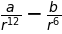

In [50]:
a, b, r = symbols("a b r")
init_printing(use_unicode=True)

lennardJones = a/r**12 - b/r**6
lennardJones

In [28]:
force = -lennardJones.diff(r)
forceres = force.subs({a:1, b:2, r:3})
forceres

In [19]:
"""
equationDistanceMinimum = (force /. r -> rMin) == 0
equationEnergieMinimum = (lennardJones /. r -> rMin) == -eMin;
criticalPointSolutions = 
Solve[{equationDistanceMinimum, equationEnergieMinimum}, {a, b}];

"""

'\nequationDistanceMinimum = (force /. r -> rMin) == 0\n\n\n'

In [54]:
rMin = symbols('rMin')

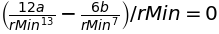

In [56]:
equationDistanceMinimum = Eq(force.subs({r: rMin}) / rMin, 0)
equationDistanceMinimum

In [66]:
#equationEnergieMinimum = (lennardJones /. r -> rMin) == -eMin;
eMin = symbols('eMin')
equationEnergieMinimum = Eq(lennardJones.subs({r:rMin}), -eMin)

In [67]:
criticalPoints = solve([equationDistanceMinimum, equationEnergieMinimum], a, b)
criticalPoints

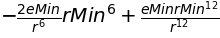

In [68]:
lennardJonesCritical = lennardJones.subs(criticalPoints)
lennardJonesCritical

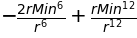

In [124]:
lennardJonesScaled = expand(lennardJonesCritical / eMin)
lennardJonesScaled

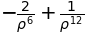

In [123]:
rho = symbols('rho')
energy = expand(lennardJonesScaled.subs({r: rho * rMin}))
energy

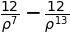

In [79]:
forceScaled = expand(energy.diff(rho))
forceScaled

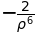

In [122]:
energyAttractive = expand(lennardJonesScaled.subs({r: rho * rMin})).as_terms()[0][1][0]
energyAttractive

In [125]:
energyRepulsive = expand(lennardJonesScaled.subs({r: rho * rMin})).as_terms()[0][0][0]
energyRepulsive

In [126]:
forceScaledAttractive = expand(forceScaled.subs({r: rho * rMin})).as_terms()[0][1][0]
forceScaledAttractive

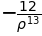

In [127]:
forceScaledRepulsive = expand(forceScaled.subs({r: rho * rMin})).as_terms()[0][0][0]
forceScaledRepulsive

#### Graphics

In [133]:
from mpmath import *

In [151]:
parabolaApproximation = series(energy, rho, n=3, x0=1).removeO()
parabolaApproximation

In [152]:
cubicApproximation = series(energy, rho, n=4, x0=1).removeO()
cubicApproximation

### Plot

In [14]:
import matplotlib.pyplot as plt

In [15]:
a = (1,1)
isinstance(a, tuple)
a = [1,1]
isinstance(a, tuple)

False

In [16]:
def createCircle(center, radius=1):
    if isinstance(center, tuple):
        circle = plt.Circle(xy=center,radius=radius)
    else:
        circle = plt.Circle(xy=center[0], radius=radius, color=center[1])    
    return circle

In [17]:
def generateCircles(start, xlim, ylim, radius=1):
    res = []
    current = start
    cnty = 0
    cntx = 0
    while cnty < ylim:
        cntx = 0
        while cntx < xlim + cnty % 2:
            res.append(current)
            current = (current[0] + 2, current[1])
            cntx += 1
        cnty += 1
        current = (start[0] - cnty%2, start[1] + np.sqrt(3) * cnty)
    return res

In [24]:
start = (-9, -np.sqrt(3) * 5)
# circles = generateCircles(start=start, xlim=(-11,11), ylim=(-5*np.sqrt(3)-1, 5*np.sqrt(3)+1))
circles = generateCircles(start=start, xlim=10, ylim=11)

In [20]:
def addColor(circles):
    level_1 = 5
    level_2 = 8
    res = []
    for c in circles:
        if np.abs(c[0]) > level_2 or np.abs(c[1]) > level_2:
            res.append([c, 'r'])
        elif np.abs(c[0]) < level_1 and np.abs(c[1]) < level_1:
            res.append([c, 'b'])
        else:
            res.append([c, 'g'])
    return res

In [21]:
circle_color = addColor(circles=circles)

In [60]:
def onclick(event):
    plt.draw('1')

<IPython.core.display.Javascript object>


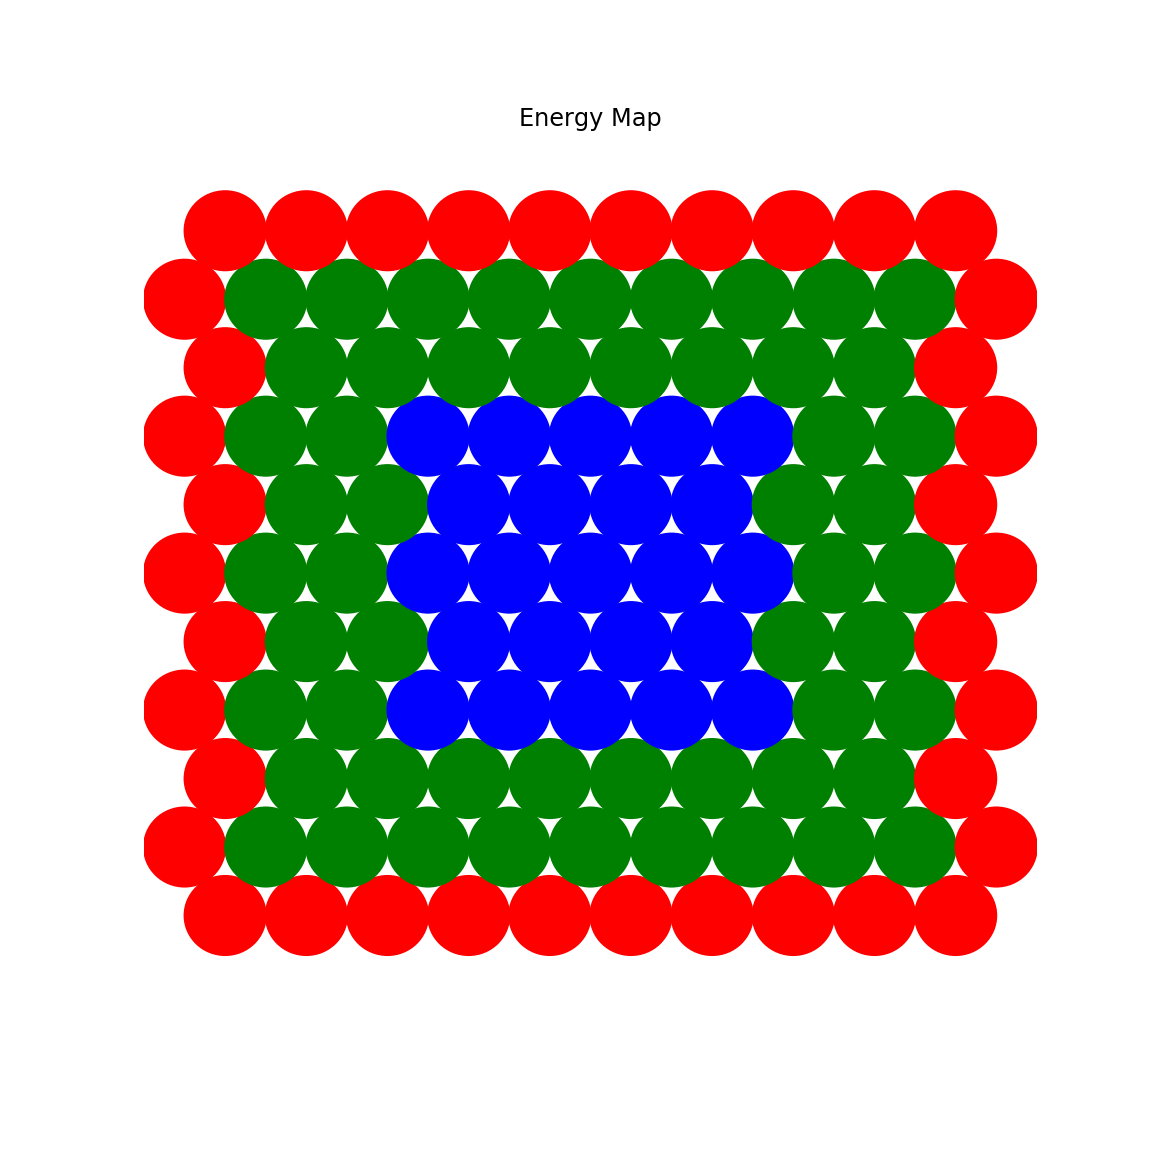

In [61]:
from importlib import reload
reload(plt)
%matplotlib notebook
fig = plt.figure(figsize=[8, 8])
plt.axes(xlim=(-11,11), ylim=(-11,11))
circlesPlot = [createCircle(c) for c in circle_color]
ax=plt.gca()
for c in circlesPlot:
    ax.add_patch(c)
ax.axis('off')
plt.title('Energy Map')
plt.show()
cid = fig.canvas.mpl_connect('mouse_notify_event', onclick)

### More interactive one

In [62]:
def generateCirclesInteractive(r):
    res = []
    radius = 1
    edgeLen = 2 * r - 1
    for i in range(edgeLen):
        for j in range(edgeLen):
            cur = ((2*i+1) * radius - (edgeLen-1) * radius, (2*j+1) * radius - (edgeLen-1) * radius)
            res.append(cur)
    return res

In [63]:
from IPython.html.widgets import *
def circlePlotImage(f):
    circlesCoor = generateCirclesInteractive(f)
    fig = plt.figure(figsize=[8, 8])
    plt.axes(xlim=(-11,11), ylim=(-11,11))
    ax=plt.gca()
    circles = [createCircle(cc) for cc in circlesCoor]
    for c in circles:
        ax.add_patch(c)
    ax.axis('off')
    plt.show()

In [64]:
interact(circlePlotImage, f=(1,5))

interactive(children=(IntSlider(value=3, description='f', max=5, min=1), Output()), _dom_classes=('widget-inte…

<function __main__.circlePlotImage(f)>